<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.227755,70.081866,51.285049,-0.021778,197.572892,197.614563,-0.041671
1,0.0,1.0,32.751792,27.137125,37.291557,-0.184497,106.995977,107.253415,-0.257438
2,0.0,2.0,26.363540,20.580504,64.145558,0.480115,121.569717,121.160853,0.408864
3,0.0,3.0,62.091388,33.789843,31.896033,-0.032749,137.744515,137.834749,-0.090234
4,0.0,4.0,64.134754,61.719094,29.215739,-0.015047,165.054540,165.104873,-0.050333
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.889977,52.713297,66.208731,-0.103148,154.708857,154.734357,-0.025499
59996,999.0,56.0,37.780046,88.873447,98.434729,0.115742,235.203964,235.023577,0.180387
59997,999.0,57.0,29.433812,48.739149,98.706567,-0.205524,186.674005,186.829437,-0.155432
59998,999.0,58.0,83.275326,57.931643,90.446073,0.088444,241.741485,241.710753,0.030732


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.227755  70.081866  51.285049  ...  197.572892  197.614563 -0.041671
      1.0    32.751792  27.137125  37.291557  ...  106.995977  107.253415 -0.257438
      2.0    26.363540  20.580504  64.145558  ...  121.569717  121.160853  0.408864
      3.0    62.091388  33.789843  31.896033  ...  137.744515  137.834749 -0.090234
      4.0    64.134754  61.719094  29.215739  ...  165.054540  165.104873 -0.050333
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.889977  52.713297  66.208731  ...  154.708857  154.734357 -0.025499
      56.0   37.780046  88.873447  98.434729  ...  235.203964  235.023577  0.180387
      57.0   29.433812  48.739149  98.706567  ...  186.674005  186.829437 -0.155432
      58.0   83.275326  57.931643  90.446073  ...  241.741485  241.710753  0.030732
      59.0   37.474968  83.730057  92.429418  ...  223.623047  223.570308  0.052738

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.227755  70.081866  51.285049  ...  197.572892  197.614563 -0.041671
      1.0    32.751792  27.137125  37.291557  ...  106.995977  107.253415 -0.257438
      2.0    26.363540  20.580504  64.145558  ...  121.569717  121.160853  0.408864
      3.0    62.091388  33.789843  31.896033  ...  137.744515  137.834749 -0.090234
      4.0    64.134754  61.719094  29.215739  ...  165.054540  165.104873 -0.050333
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.889977  52.713297  66.208731  ...  154.708857  154.734357 -0.025499
      56.0   37.780046  88.873447  98.434729  ...  235.203964  235.023577  0.180387
      57.0   29.433812  48.739149  98.706567  ...  186.674005  186.829437 -0.155432
      58.0   83.275326  57.931643  90.446073  ...  241.741485  241.710753  0.030732
      59.0   37.474968  83.730057  92.429418  ...  223.623047  223.570308  0.052738

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.227755,70.081866,51.285049,-0.021778,197.572892,197.614563,-0.041671
1,0.0,1.0,32.751792,27.137125,37.291557,-0.184497,106.995977,107.253415,-0.257438
2,0.0,2.0,26.363540,20.580504,64.145558,0.480115,121.569717,121.160853,0.408864
3,0.0,3.0,62.091388,33.789843,31.896033,-0.032749,137.744515,137.834749,-0.090234
4,0.0,4.0,64.134754,61.719094,29.215739,-0.015047,165.054540,165.104873,-0.050333
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.889977,52.713297,66.208731,-0.103148,154.708857,154.734357,-0.025499
59996,999.0,56.0,37.780046,88.873447,98.434729,0.115742,235.203964,235.023577,0.180387
59997,999.0,57.0,29.433812,48.739149,98.706567,-0.205524,186.674005,186.829437,-0.155432
59998,999.0,58.0,83.275326,57.931643,90.446073,0.088444,241.741485,241.710753,0.030732


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.227755  70.081866  51.285049  ...  197.572892  197.614563 -0.041671
      1.0    32.751792  27.137125  37.291557  ...  106.995977  107.253415 -0.257438
      2.0    26.363540  20.580504  64.145558  ...  121.569717  121.160853  0.408864
      3.0    62.091388  33.789843  31.896033  ...  137.744515  137.834749 -0.090234
      4.0    64.134754  61.719094  29.215739  ...  165.054540  165.104873 -0.050333
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.889977  52.713297  66.208731  ...  154.708857  154.734357 -0.025499
      56.0   37.780046  88.873447  98.434729  ...  235.203964  235.023577  0.180387
      57.0   29.433812  48.739149  98.706567  ...  186.674005  186.829437 -0.155432
      58.0   83.275326  57.931643  90.446073  ...  241.741485  241.710753  0.030732
      59.0   37.474968  83.730057  92.429418  ...  223.623047  223.570308  0.052738

[60000 rows x 7 columns]

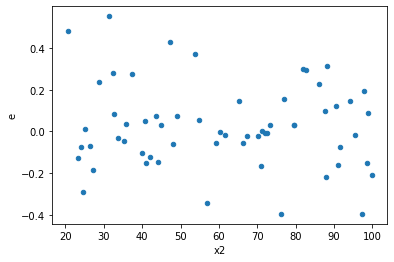

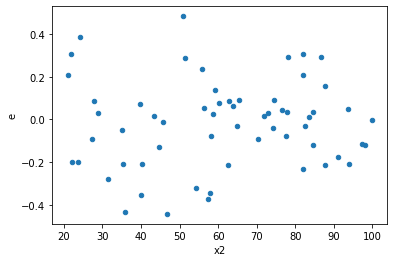

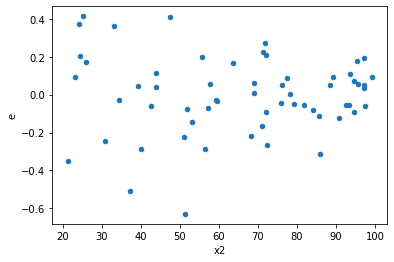

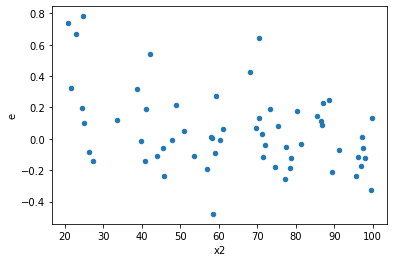

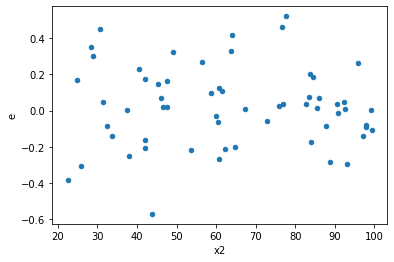

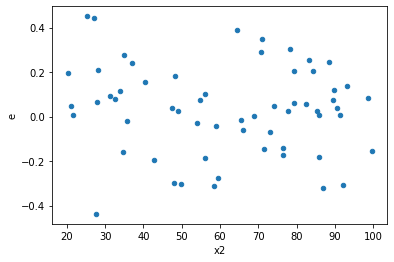

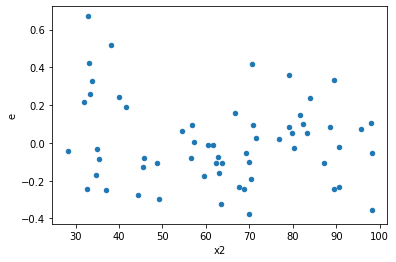

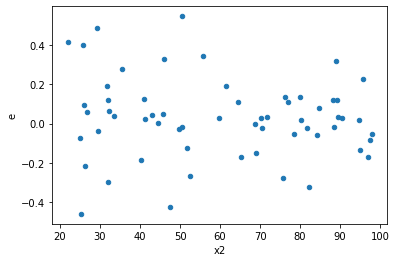

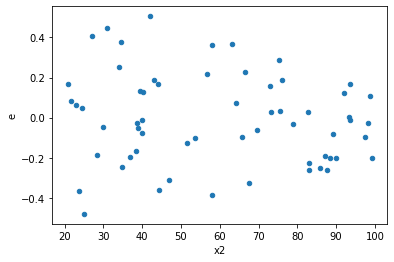

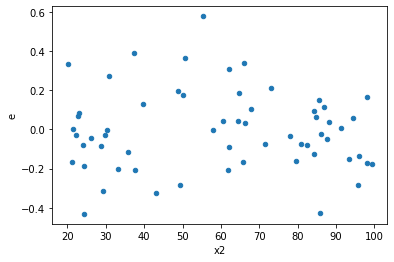

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,22.0,32.0,0.40480347259146354,1.9333078446359413,0.01927635583768874,0.06236476918180456,3.283443036390688,0.00498891146282765,0.9975055442685862,Reject001=0 : Heteroscedasticity
3.0,33.0,21.0,1.5305353324767021,1.1280390382561083,0.04782922913989694,0.05640195191280541,1.1581782770960232,0.6893561050838106,0.6553219474580947,Reject001=1 : Homoscedasticity
4.0,26.0,28.0,1.2306353712561051,1.504953868552157,0.049225414850244203,0.05573903216859841,1.1355574496686172,0.7475563604569344,0.6262218197715328,Reject001=1 : Homoscedasticity
7.0,27.0,27.0,0.4921532279492373,1.8207133475161879,0.0189289703057399,0.0700274364429303,3.699484721664741,0.001118939469587854,0.9994405302652061,Reject001=0 : Heteroscedasticity
8.0,27.0,27.0,0.8304665639942885,1.9376451524064264,0.03194102169208802,0.07452481355409332,2.3332006806956196,0.031567201637966225,0.9842163991810169,Reject001=1 : Homoscedasticity
9.0,30.0,24.0,0.5860421109808428,1.4106225495319544,0.02020834865451182,0.061331415197041494,3.0087909279484917,0.00479890987321574,0.9976005450633921,Reject001=0 : Heteroscedasticity
13.0,31.0,23.0,0.7995398944593665,0.6359256676909651,0.026651329815312215,0.028905712167771144,1.0720130542812916,0.8441263158724488,0.5779368420637756,Reject001=1 : Homoscedasticity
16.0,32.0,22.0,0.9609455944662475,1.3224656386720923,0.030998244982782176,0.06297455422248059,2.001764090079928,0.07183701206614712,0.9640814939669264,Reject001=1 : Homoscedasticity
17.0,26.0,28.0,0.6017056475543419,1.1537359060839616,0.024068225902173675,0.04273095948459117,1.7804822056448806,0.14317539979537308,0.9284123001023135,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,25.0,1.3225494852815904,0.865664923513702,0.04723391018862823,0.03606937181307091,0.7592693675746215,0.4877434629793776,Reject001=1 : Homoscedasticity
1.0,22.0,32.0,0.40480347259146354,1.9333078446359413,0.01927635583768874,0.06236476918180456,3.283443036390688,0.00498891146282765,Reject001=0 : Heteroscedasticity
2.0,24.0,30.0,1.1172904956466982,1.0893062739230555,0.048577847636812964,0.03756228530769157,0.7799627961876144,0.5142462748195271,Reject001=1 : Homoscedasticity
3.0,33.0,21.0,1.5305353324767021,1.1280390382561083,0.04782922913989694,0.05640195191280541,1.1581782770960232,1.3106438949161894,Reject001=1 : Homoscedasticity
4.0,26.0,28.0,1.2306353712561051,1.504953868552157,0.049225414850244203,0.05573903216859841,1.1355574496686172,1.2524436395430656,Reject001=1 : Homoscedasticity
5.0,24.0,30.0,1.1817211094224522,0.9932444842280358,0.051379178670541405,0.03424980980096675,0.6724053425522497,0.30119795590071646,Reject001=1 : Homoscedasticity
6.0,24.0,30.0,1.3743840757046266,1.1278903999012808,0.05975582937846203,0.03889277241038899,0.6565212271238099,0.27337861357097193,Reject001=1 : Homoscedasticity
7.0,27.0,27.0,0.4921532279492373,1.8207133475161879,0.0189289703057399,0.0700274364429303,3.699484721664741,0.001118939469587854,Reject001=0 : Heteroscedasticity
8.0,27.0,27.0,0.8304665639942885,1.9376451524064264,0.03194102169208802,0.07452481355409332,2.3332006806956196,0.031567201637966225,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      929
Reject001=0 : Heteroscedasticity     71
Name: Result_test, dtype: int64